<a href="https://colab.research.google.com/github/yhw991228/damentor_3/blob/main/predict_traffic_cmp_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
import os
import datetime
import matplotlib as mpl
import IPython
import IPython.display

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [4]:
import tensorflow as tf

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
traffic_data_2015_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2015_01분기.csv',encoding='cp949')
traffic_data_2015_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2015_02분기.csv',encoding='cp949')
traffic_data_2015_03=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2015_03분기.csv',encoding='cp949')
traffic_data_2015_04=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2015_04분기.csv',encoding='cp949')
traffic_data_2016_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2016_01분기.csv',encoding='cp949')
traffic_data_2016_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2016_02분기.csv',encoding='cp949')
traffic_data_2016_03=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2016_03분기.csv',encoding='cp949')
traffic_data_2016_04=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2016_04분기.csv',encoding='cp949')
traffic_data_2017_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2017_01분기.csv',encoding='cp949')
traffic_data_2017_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2017_02분기.csv',encoding='cp949')
traffic_data_2017_03=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2017_03분기.csv',encoding='cp949')
traffic_data_2017_04=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2017_04분기.csv',encoding='cp949')
traffic_data_2018_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2018_01분기.csv',encoding='cp949')
traffic_data_2018_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2018_02분기.csv',encoding='cp949')
traffic_data_2018_03=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2018_03분기.csv',encoding='cp949')
traffic_data_2018_04=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2018_04분기.csv',encoding='cp949')
traffic_data_2019_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2019_01분기.csv',encoding='cp949')
traffic_data_2019_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2019_02분기.csv',encoding='cp949')
traffic_data_2019_03=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2019_03분기.csv',encoding='cp949')
traffic_data_2019_04=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2019_04분기.csv',encoding='cp949')
traffic_data_2020_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2020_01분기.csv',encoding='cp949')
traffic_data_2020_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2020_02분기.csv',encoding='cp949')
traffic_data_2020_03=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2020_03분기.csv',encoding='cp949')
traffic_data_2020_04=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2020_04분기.csv',encoding='cp949')
traffic_data_2021_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2021_01분기.csv',encoding='cp949')
traffic_data_2021_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2021_02분기.csv',encoding='cp949')

In [7]:
traffic_data_2015=pd.concat([traffic_data_2015_01,traffic_data_2015_02,traffic_data_2015_03,traffic_data_2015_04])
traffic_data_2016=pd.concat([traffic_data_2016_01,traffic_data_2016_02,traffic_data_2016_03,traffic_data_2016_04])
traffic_data_2017=pd.concat([traffic_data_2017_01,traffic_data_2017_02,traffic_data_2017_03,traffic_data_2017_04])
traffic_data_2018=pd.concat([traffic_data_2018_01,traffic_data_2018_02,traffic_data_2018_03,traffic_data_2018_04])
traffic_data_2019=pd.concat([traffic_data_2019_01,traffic_data_2019_02,traffic_data_2019_03,traffic_data_2019_04])
traffic_data_2020=pd.concat([traffic_data_2020_01,traffic_data_2020_02,traffic_data_2020_03,traffic_data_2020_04])
traffic_data_2021=pd.concat([traffic_data_2021_01,traffic_data_2021_02])
traffic_data_past=pd.concat([traffic_data_2015,traffic_data_2016,traffic_data_2017,traffic_data_2018,traffic_data_2019])
traffic_data_future=pd.concat([traffic_data_2020,traffic_data_2021])

In [8]:
traffic_data_past['집계일자']=pd.to_datetime(traffic_data_past['집계일자'],format='%Y%m%d')
traffic_data_past['연도']=traffic_data_past['집계일자'].dt.year
traffic_data_future['집계일자']=pd.to_datetime(traffic_data_future['집계일자'],format='%Y%m%d')
traffic_data_future['연도']=traffic_data_future['집계일자'].dt.year

In [9]:
def change_traffic(traffic_data):
    traffic_data.index=traffic_data.집계일자
    traffic_data=traffic_data.drop('집계일자',axis=1)
    traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]
    traffic_data.index=pd.to_datetime(traffic_data.index, format='%Y%m%d')
    traffic_data['year']=traffic_data.index.year 
    traffic_data['month']=traffic_data.index.month
    days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
    traffic_data['day_of_week']=traffic_data.index.dayofweek 
    traffic_data.day_of_week=traffic_data.day_of_week.apply(lambda x : days[x])
    traffic_data.head()
    return traffic_data

In [10]:
traffic_data_past=change_traffic(traffic_data_past)
traffic_data_past.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,,
2015-01-01,가락,329,14,31,45,467,1,887,2015,1,THU
2015-01-01,가락,696,16,4,2,11,37,766,2015,1,THU
2015-01-01,가락(개),2931,50,91,114,454,316,3956,2015,1,THU
2015-01-01,가락(개),5219,20,24,0,1,283,5547,2015,1,THU
2015-01-01,가락(개),3374,42,107,94,603,415,4635,2015,1,THU


In [11]:
traffic_data_past=traffic_data_past.replace('서서울영업소','서서울')
traffic_data_past=traffic_data_past.replace('서울영업소','서울')
traffic_data_past=traffic_data_past.replace('서대구영업소','서대구')
traffic_data_past=traffic_data_past.replace('북대구영업소','북대구')
traffic_data_past=traffic_data_past.replace('남대구영업소','남대구')
traffic_data_future=traffic_data_future.replace('서서울영업소','서서울')
traffic_data_future=traffic_data_future.replace('서울영업소','서울')
traffic_data_future=traffic_data_future.replace('서대구영업소','서대구')
traffic_data_future=traffic_data_future.replace('북대구영업소','북대구')
traffic_data_future=traffic_data_future.replace('남대구영업소','남대구')

In [12]:
seoul_traffic_data_past=traffic_data_past[((traffic_data_past['영업소명']=='서서울') | (traffic_data_past['영업소명']=='서울') | (traffic_data_past['영업소명']=='남서울'))&(traffic_data_past['day_of_week']=='MON')
]
seoul_traffic_data_past=seoul_traffic_data_past.replace(max(seoul_traffic_data_past['1종교통량']),10000)
seoul_traffic_data_past=seoul_traffic_data_past.replace(max(seoul_traffic_data_past['1종교통량']),10000)
#이상치 2개 수정 **

In [28]:
seoul_traffic_data_past=seoul_traffic_data_past.groupby('집계일자').mean()

# LSTM을 돌려 보자

In [29]:
def univariate_data(dataset,start_index,end_index,history_size,target_size):
    data=[]
    labels=[]
    start_index=start_index+history_size
    if end_index is None:
        end_index=len(dataset)-target_size
    for i in range(start_index,end_index):
        indices = range(i-history_size,i)
        data.append(np.reshape(dataset[indices],(history_size,1)))
        labels.append(dataset[i+target_size])
    return np.array(data),np.array(labels)

In [30]:
seoul_traffic_data

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month
집계일자,,,,,,,,,
2015-01-05,39495.000,1821.250,3098.500,1024.500,799.500,2365.000,48603.750,2015.0,1.0
2015-01-12,40445.125,1783.000,3095.875,1027.125,781.250,2449.125,49581.500,2015.0,1.0
2015-01-19,39080.625,1768.875,3114.875,999.250,724.000,2347.875,48035.500,2015.0,1.0
2015-01-26,40234.250,1755.750,3144.500,1015.375,740.250,2468.500,49358.625,2015.0,1.0
2015-02-02,40371.625,1856.250,3139.625,1075.375,790.125,2471.250,49704.250,2015.0,2.0
...,...,...,...,...,...,...,...,...,...
2019-12-02,40407.625,1452.375,3013.375,1291.250,946.375,2167.375,49278.375,2019.0,12.0
2019-12-09,40917.875,1442.000,3077.375,1302.250,1045.750,2222.250,50007.500,2019.0,12.0
2019-12-16,40943.000,1480.875,2959.625,1230.125,1015.375,2192.125,49821.125,2019.0,12.0


In [31]:
uni_data=seoul_traffic_data_past['1종교통량']
uni_data.index=seoul_traffic_data_past.index
uni_data

집계일자
2015-01-05    39495.000
2015-01-12    40445.125
2015-01-19    39080.625
2015-01-26    40234.250
2015-02-02    40371.625
                ...    
2019-12-02    40407.625
2019-12-09    40917.875
2019-12-16    40943.000
2019-12-23    40486.625
2019-12-30    40211.750
Name: 1종교통량, Length: 259, dtype: float64

numpy.ndarray

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3df7b047d0>],
      dtype=object)

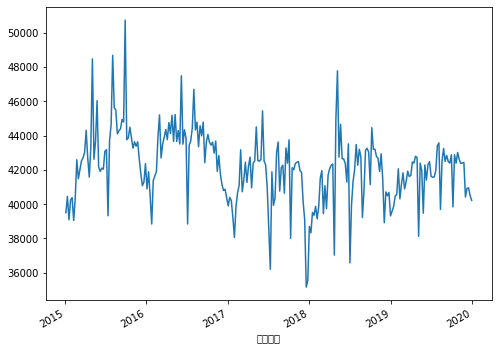

In [32]:
uni_data.plot(subplots=True)

In [33]:
uni_data=uni_data.values
uni_data=(uni_data)/max(uni_data) #정규화

In [34]:
len(uni_data)

259

In [40]:
TRAIN_SPLIT = 225 # 10프로 test set
tf.random.set_seed(13)

In [41]:
univariate_past_history = 20
univariate_future_target = 0
x_train_uni,y_train_uni = univariate_data(uni_data , 0, TRAIN_SPLIT,univariate_past_history,univariate_future_target)
x_val_uni,y_val_uni = univariate_data(uni_data , TRAIN_SPLIT,None,univariate_past_history,univariate_future_target)

In [42]:
def create_time_steps(length):
    return list(range(-length,0))

In [43]:
def show_plot(plot_data,delta,title):
    labels=['History','True Future','Model Prediction']
    marker = ['.-','rx','go']
    time_steps=create_time_steps(plot_data[0].shape[0])
    if delta:
        future=delta
    else:
        future =0 
    
    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i],marker[i], markersize=10,label=labels[i])
        else:
            plt.plot(time_steps,plot_data[i].flatten(),marker[i],label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0],(future+5)*2])
    plt.xlabel('Time-Step')
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

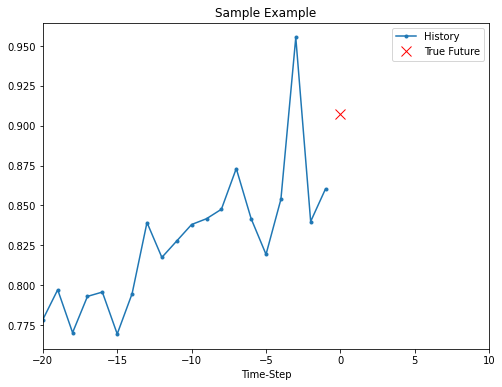

In [44]:
show_plot([x_train_uni[0],y_train_uni[0]],0,'Sample Example') #업다운이 너무 심해서 맞는건지 모르겠다 이렇게 하는건지,,

In [45]:
def baseline(history):
    return np.mean(history)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

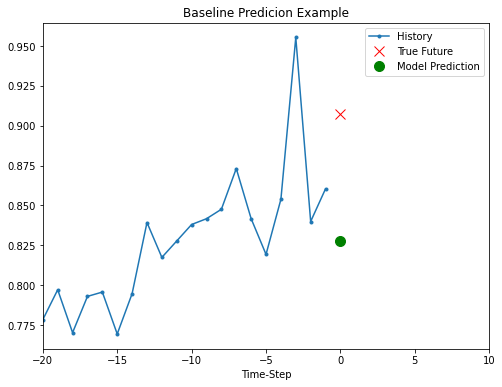

In [46]:
show_plot([x_train_uni[0],y_train_uni[0],baseline(x_train_uni[0])],0,'Baseline Predicion Example')

In [74]:
BATCH_SIZE = 15
BUFFER_SIZE = 1000

train_univariate=tf.data.Dataset.from_tensor_slices((x_train_uni,y_train_uni))
train_univariate=train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni,y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [75]:
simple_lstm_model = tf.keras.models.Sequential([tf.keras.layers.LSTM(8,input_shape=x_train_uni.shape[-2:]),tf.keras.layers.Dense(1)])
simple_lstm_model.compile(optimizer='adam' , loss='mae')

In [76]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(14, 1)


In [77]:
EVALUATION_INTERVAL = 3
EPOCHS = 15
simple_lstm_model.fit(train_univariate,epochs=EPOCHS,validation_data=val_univariate,validation_steps=50)

Epoch 1/15
14/14 [==============================] - 3s 51ms/step - loss: 0.8237 - val_loss: 0.7277
Epoch 2/15
14/14 [==============================] - 0s 16ms/step - loss: 0.6637 - val_loss: 0.5604
Epoch 3/15
14/14 [==============================] - 0s 17ms/step - loss: 0.4844 - val_loss: 0.3638
Epoch 4/15
14/14 [==============================] - 0s 17ms/step - loss: 0.2671 - val_loss: 0.1145
Epoch 5/15
14/14 [==============================] - 0s 16ms/step - loss: 0.0666 - val_loss: 0.0650
Epoch 6/15
14/14 [==============================] - 0s 17ms/step - loss: 0.0411 - val_loss: 0.0228
Epoch 7/15
14/14 [==============================] - 0s 18ms/step - loss: 0.0348 - val_loss: 0.0256
Epoch 8/15
14/14 [==============================] - 0s 17ms/step - loss: 0.0350 - val_loss: 0.0205
Epoch 9/15
14/14 [==============================] - 0s 16ms/step - loss: 0.0344 - val_loss: 0.0199
Epoch 10/15
14/14 [==============================] - 0s 16ms/step - loss: 0.0340 - val_loss: 0.0199
Epoch 11/

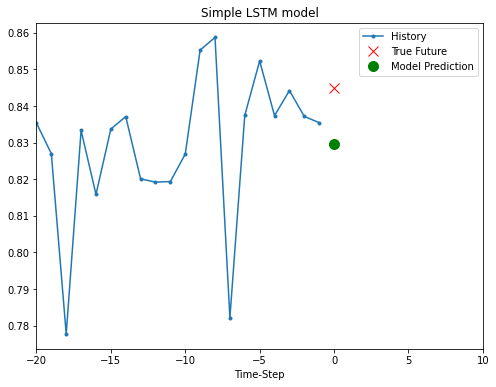

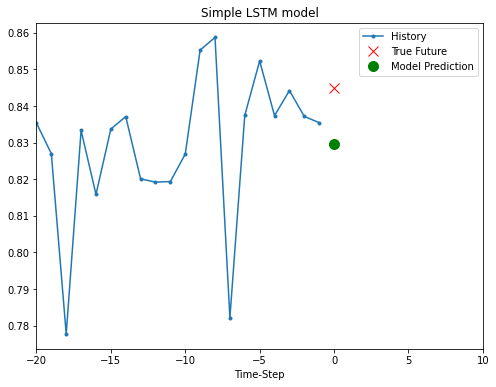

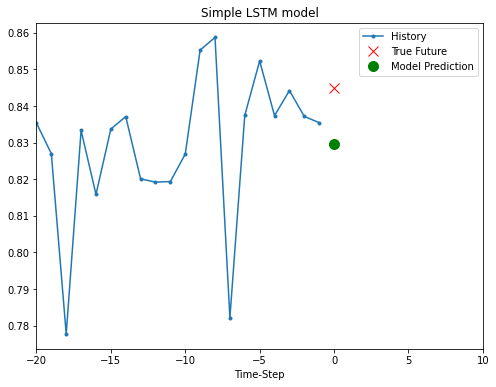

In [78]:
for x,y in val_univariate.take(3):
  plot=show_plot([x[0].numpy(),y[0].numpy(),simple_lstm_model.predict(x)[0]],0,'Simple LSTM model')
  plot.show()

In [79]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,input_shape=x_train_uni.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(),loss='mae')

## 아오~~ 다시 돌려보자

In [80]:
for i in 

In [81]:
x_train=x_train.reshape(len(x_train)//3,3,1)

In [82]:
y_train.shape

(256,)

In [83]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [86]:
model = Sequential()
model.add(LSTM(10, activation = 'relu', input_shape=(3,1)))
# DENSE와 사용법 동일하나 input_shape=(열, 몇개씩잘라작업)
model.add(Dense(5))
model.add(Dense(1))
 
model.summary()
 
# 3. 실행
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 6         
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [87]:
hist=model.fit(x_train, y_train, epochs=30, batch_size=10)

#찐막

In [90]:
data=seoul_traffic_data['1종교통량']

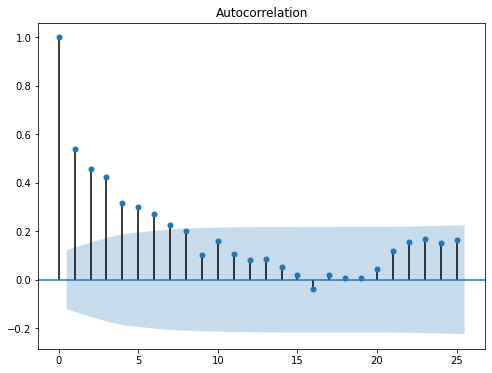

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data);

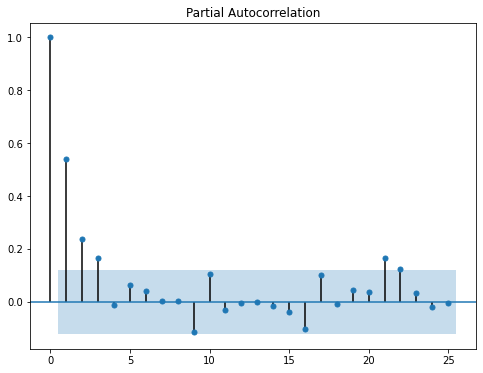

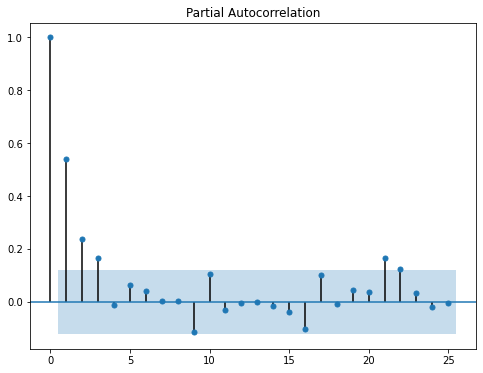

In [92]:
plot_pacf(data)

In [96]:
import numpy as np

def sampling(sequence, n_steps):

  X, Y = list(), list()

  for i in range(len(sequence)):
    sam = i + n_steps
    if sam > len(sequence)-1:
      break
    x, y = sequence[i:sam], sequence[sam]
    X.append(x)
    Y.append(y)
  return np.array(X), np.array(Y)

In [97]:
n_steps = 3

X, Y = sampling(data.tolist(), n_steps)

In [100]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [101]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [102]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.fit(X, Y, epochs=200, verbose=0)

In [107]:
traffic_data_future=change_traffic(traffic_data_future)

In [111]:
traffic_data_future=traffic_data_future[((traffic_data_future['영업소명']=='서서울') | (traffic_data_future['영업소명']=='서울') | (traffic_data_future['영업소명']=='남서울'))&(traffic_data_future['day_of_week']=='MON')
]

In [114]:
seoul_traffic_data_future=traffic_data_future.groupby('집계일자').mean()

In [116]:
seoul_traffic_data_future

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month
집계일자,,,,,,,,,
2020-01-06,38733.125,1390.750,2965.875,1292.000,946.375,2065.375,47393.500,2020.0,1.0
2020-01-13,40268.375,1454.125,2950.875,1255.375,1004.750,2144.500,49078.000,2020.0,1.0
2020-01-20,41291.125,1475.125,2994.875,1323.375,1007.875,2185.500,50277.875,2020.0,1.0
2020-01-27,37058.250,477.375,2080.000,363.125,180.375,1494.500,41653.625,2020.0,1.0
2020-02-03,39308.375,1452.000,2924.875,1271.375,960.000,2149.625,48066.250,2020.0,2.0
...,...,...,...,...,...,...,...,...,...
2021-05-31,42255.875,1477.875,2685.750,1387.125,1109.875,2079.875,50996.375,2021.0,5.0
2021-06-07,42730.000,1467.500,2693.750,1380.250,1159.375,2055.375,51486.250,2021.0,6.0
2021-06-14,42707.750,1474.625,2721.375,1386.250,1129.125,2058.125,51477.250,2021.0,6.0


In [121]:
x=np.array([40917.875,40943.0,40486.625])
x = x.reshape((1, n_steps, 1))

array([[40810.387]], dtype=float32)

In [123]:
x=np.array([38733.125,40268.375,41291.125])

In [124]:
x=x.reshape((1,3,1))
y=model.predict(x)

In [125]:
y

array([[39886.45]], dtype=float32)

In [ ]:
#37058.250